<a href="https://www.kaggle.com/code/nigamshitij/scikit-tests-for-overfitting-underfitting?scriptVersionId=177012720" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.9 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [3]:
from fastai.vision.all import plt
from fastbook import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [4]:
# define quadratic
def quad(a, b, c, x):
    return a*x**2 + b*x + c

# define partial with fixed
from functools import partial
def mk_quad(a, b, c):
    return partial(quad, a, b, c)

# define f
f = mk_quad(3, 2, 1)

from numpy.random import normal, seed, uniform
np.random.seed(42)

def noise(x, scale):
    return normal(scale = scale, size = x.shape)

def add_noise(x, mult_scale, add_scale):
    return x*(1+noise(x, mult_scale)) + noise(x, add_scale)

x = torch.linspace(-2, 2, steps = 20)[:, None]
y = add_noise(f(x), 0.3, 1.5)
print(x.shape, y.shape)

torch.Size([20, 1]) torch.Size([20, 1])


In [5]:
# plt.plot??

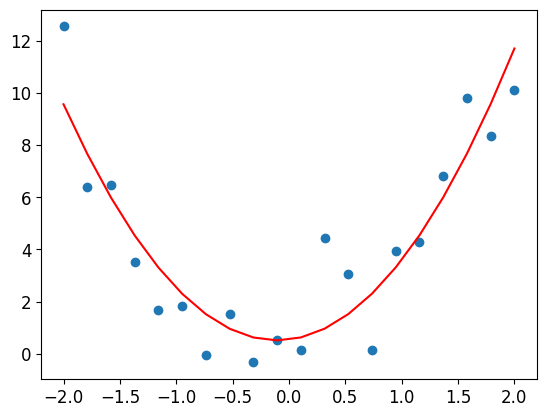

In [6]:
def plot_poly(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
#     plot_function(model.predict)
    x_test = torch.linspace(-2, 2, steps = 50)[:, None]
    plt.plot(x, model.predict(x), color = 'r')
    plt.scatter(x, y)

plot_poly(2)

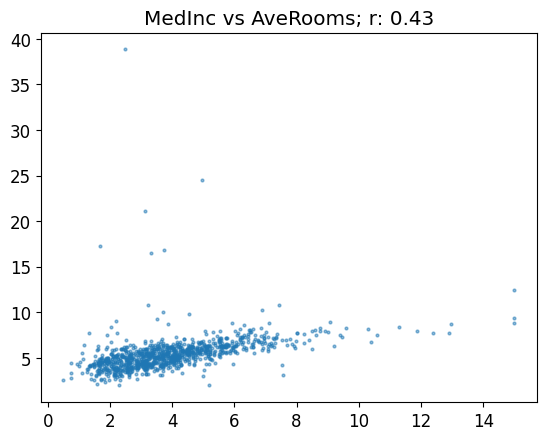

In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame = True)
housing = housing['data'].join(housing['target']).sample(1000, random_state = 52)
# housing.head()

# np.set_printoptions??
np.set_printoptions(precision = 2, suppress = True)
# np.corrcoef(housing, rowvar = False)
np.corrcoef(housing['MedInc'], housing['MedHouseVal'])

def corr(x, y):
    return np.corrcoef(x, y)[0][1]

corr(housing['MedInc'], housing['MedHouseVal'])

def show_corr(dataframe, a, b):
    x, y = dataframe[a], dataframe[b]
    plt.scatter(x, y, alpha = 0.5, s = 4)
    plt.title(f'{a} vs {b}; r: {corr(x, y):.2f}')
    plt.show()

# show_corr(housing, 'MedInc', 'MedHouseVal')
show_corr(housing, 'MedInc', 'AveRooms')

def corr_dictionary(eval_pred):
    return {'pearson': corr(*eval_pred)}

In [ ]:
# dataset_split = 